[74  1 99]


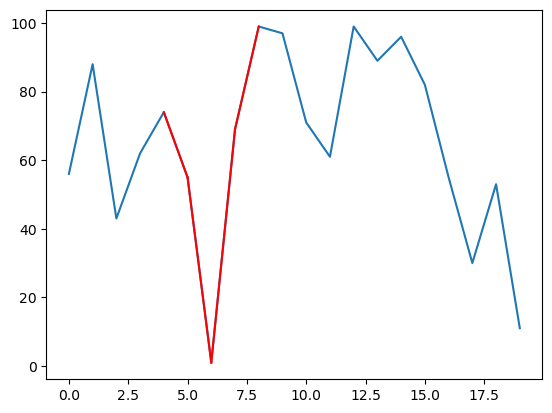

In [10]:

import numpy as np
import matplotlib.pyplot as plt
    
numbers = np.random.randint(1, 100, 20)
    
flag1= True
flag2= False
flag3 = False
a,b,c, i = 0, 0, 0, 0
matrix = np.empty((0, 3), int)

#Записування в матрицю усіх озер (лівий берег, дно, правий берег)
while i < len(numbers)-1:
    if not numbers[i] == numbers[i+1]:
        if  flag1 and numbers[i] > numbers[i+1]:
            a=numbers[i]
            flag1= False
            flag2= True
        elif flag2 and numbers[i] < numbers[i+1]:
            b=numbers[i]
            flag2 = False
            flag3= True
        elif flag3 and numbers[i] > numbers[i+1]:
            c=numbers[i]
            flag2 = True
            flag3= False
        if c!=0 :
            new_row = np.array([a, b, c])
            matrix = np.vstack((matrix, new_row))
            a=c
            c=0
    i+=1  
depth_arr = np.empty((0,))
minimal_value=0

#пошук найбільшої глибини (від значення нижчого берега віднімається значення дна)
for row in matrix:
    if row[0]<row[2]:
            minimal_value=row[0]
    else:
        minimal_value=row[2]
    depth = minimal_value - row[1]
    depth_arr = np.append(depth_arr, depth)
    
print(matrix[np.argmax(depth_arr)])

#запис усіх елементів які знаходяться в проміжку від лівого берега до правого берега та вивід їх на екран
i=0
selected = np.empty((0, 2), int)
while i < len(numbers):
    if flag1 or matrix[np.argmax(depth_arr),0]==numbers[i]:
        flag1= True
        #selected = np.append(selected,numbers[i])
        new_row = np.array([i,numbers[i]])
        selected = np.vstack((selected, new_row))
        if numbers[i]== matrix[np.argmax(depth_arr),2]:
            flag1= False
        
    
        

    i+=1
   
plt.plot (numbers)

for j in range(len(selected) - 1):
    plt.plot(selected[j:j+2, 0], selected[j:j+2, 1], 'r')